# Water Potability Classification

Get the dataset copy from:

<p><a href="https://www.kaggle.com/datasets/adityakadiwal/water-potability?resource=download">Water potability dataset from kaggle</a> or <a href="https://raw.githubusercontent.com/cmosqueda/ml-compilations/refs/heads/main/datasets/water_potability.csv">CSV copied to Github</a></p>

<hr></hr>

Goal: Predict if water is potable (1) or not potable (0)

Type: Supervised learning, binomial classification

In this notebook, the following learning algorithms will be tried:
- KNN
- Logistic Regression
- Decision Tree Classification
- Random Forest Classification
- Naive Bayes
- Gradient Boosting
- Support Vector Machine

<hr></hr>

In [2]:
# IMPORT LIBRARIES

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

import warnings
from sklearn.exceptions import DataConversionWarning


from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

import missingno as msno
import joblib

In [2]:
# DISABLE DATA CONVERSION WARNINGS
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

In [3]:
# LOAD DATASET

df = pd.read_csv('https://raw.githubusercontent.com/cmosqueda/ml-compilations/refs/heads/main/datasets/water_potability.csv')

df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [4]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [6]:
df.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [7]:
df['Potability'].value_counts()

Potability
0    1998
1    1278
Name: count, dtype: int64

In [8]:
df['Potability'].value_counts(normalize=True)

Potability
0    0.60989
1    0.39011
Name: proportion, dtype: float64

<Axes: >

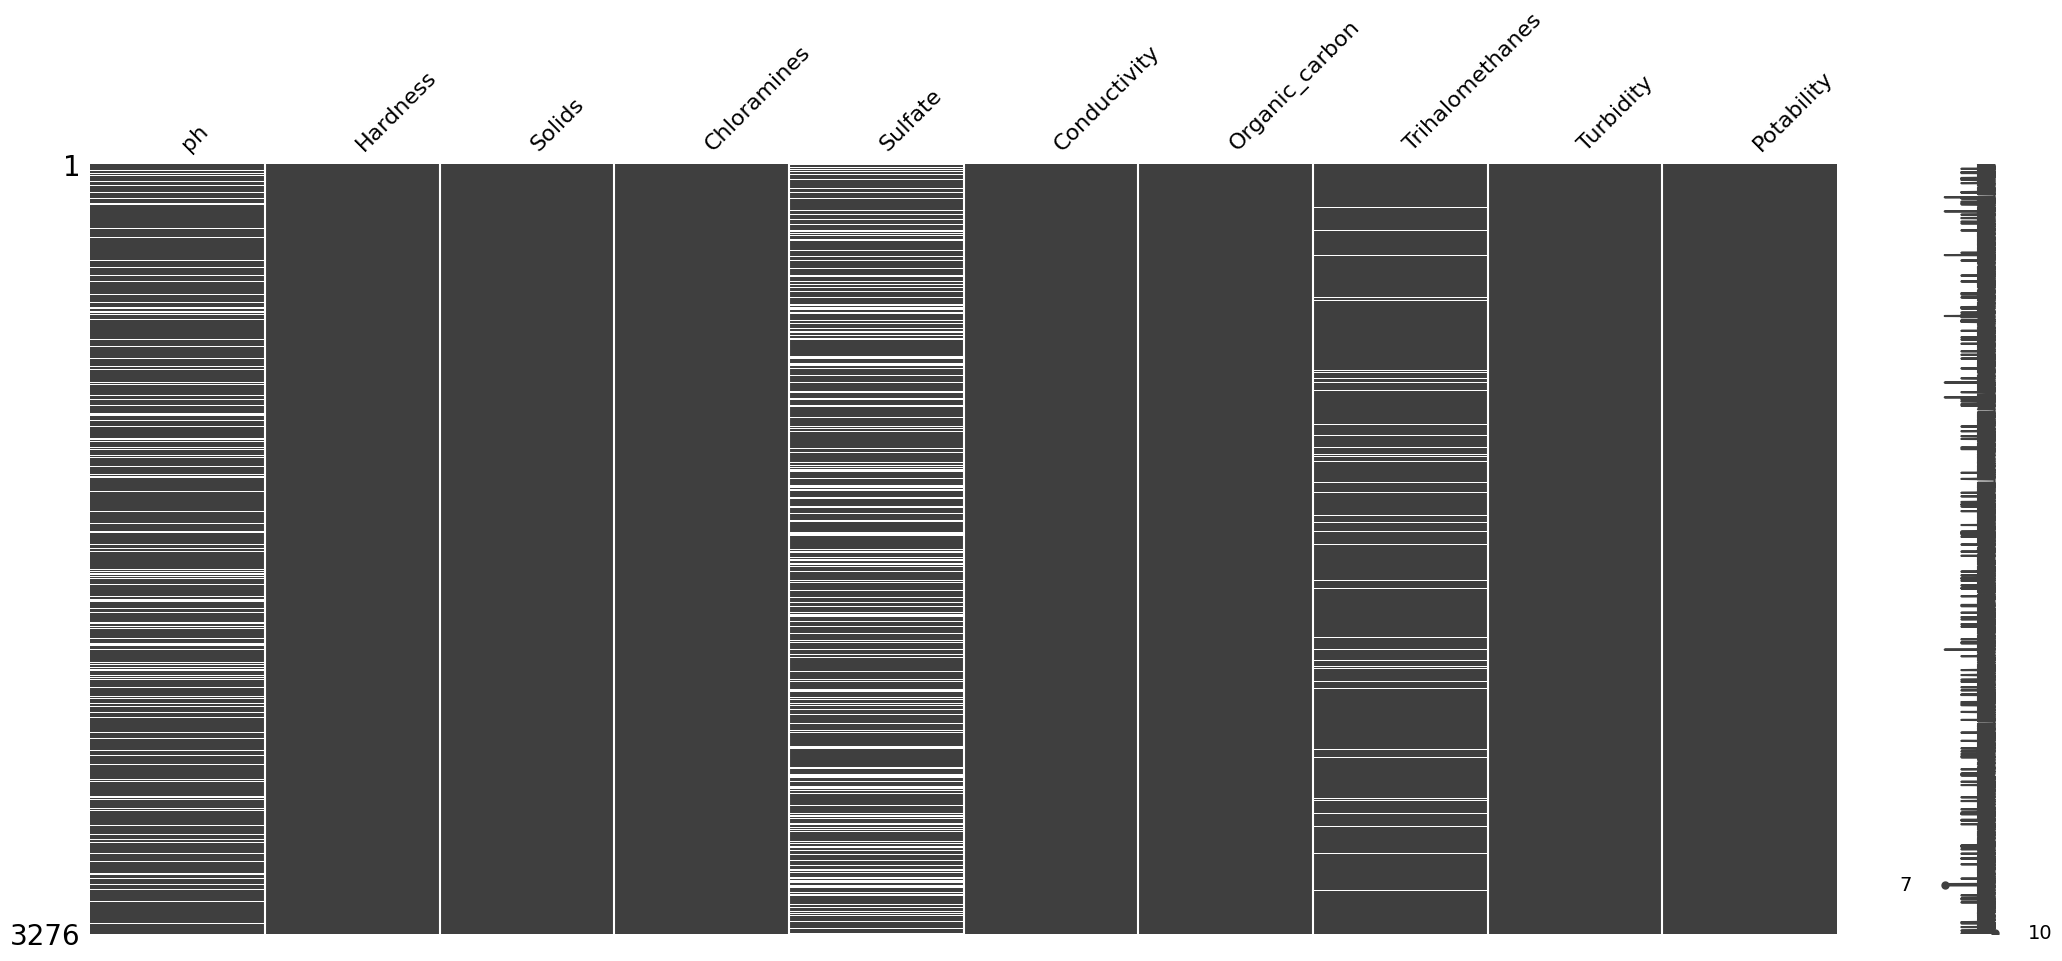

In [9]:
# VISUALIZING MISSING DATA

msno.matrix(df)

In [10]:
# SEPARATE DATA X AND Y

x = df.drop(['Potability'], axis=1)
x.head(5)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075


In [11]:
y = df[['Potability']]
y.head(5)

,Potability
0,0
1,0
2,0
3,0
4,0


In [12]:
# SPLIT DATA INTO TRAIN SET AND TEST SET, THIS WILL BE THE HOLDOUT SET

trainX_full, testX, trainY_full, testY = train_test_split(x, y, test_size=0.2, random_state=42)

In [13]:
# STRATIFIED K FOLD SETUP
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

In [14]:
# USED FOR VISUALIZATION OF ACCURACY, PRECISION, RECALL, F1, SPECIFICITY
accuracy_summary = []
precision_summary = []
recall_summary = []
f1_summary = []
specificity_summary = []

### Random Forest Classification

In [15]:
# PIPELINE FOR RANDOM FOREST

rfd_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier(random_state=42)),
])

In [16]:
# CROSS VALIDATION
rfd_accuracies = []

for fold, (train_idx, val_idx) in enumerate(skf.split(trainX_full, trainY_full), 1):
    trainX = trainX_full.iloc[train_idx]
    x_val = trainX_full.iloc[val_idx]
    trainY = trainY_full.iloc[train_idx]
    y_val = trainY_full.iloc[val_idx]

    # fit pipelines on training fold
    rfd_pipeline.fit(trainX, trainY)

    # predict on validation fold
    predictY = rfd_pipeline.predict(x_val)

    # report metrics
    print(f"\n--- Fold {fold} ---")
    print("Confusion Matrix:\n", confusion_matrix(y_val, predictY))
    print("Classification Report:\n", classification_report(y_val, predictY))
    acc = accuracy_score(y_val, predictY)
    print("Accuracy:", acc)
    rfd_accuracies.append(acc)

# OVERALL CROSS VALIDATION SCORE
print("\nAverage Cross Validation Accuracy:", np.mean(rfd_accuracies))



--- Fold 1 ---
Confusion Matrix:
 [[122  37]
 [ 57  46]]
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.77      0.72       159
           1       0.55      0.45      0.49       103

    accuracy                           0.64       262
   macro avg       0.62      0.61      0.61       262
weighted avg       0.63      0.64      0.63       262

Accuracy: 0.6412213740458015

--- Fold 2 ---
Confusion Matrix:
 [[119  40]
 [ 57  46]]
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.75      0.71       159
           1       0.53      0.45      0.49       103

    accuracy                           0.63       262
   macro avg       0.61      0.60      0.60       262
weighted avg       0.62      0.63      0.62       262

Accuracy: 0.6297709923664122

--- Fold 3 ---
Confusion Matrix:
 [[125  34]
 [ 51  52]]
Classification Report:
               precision    recall  f1-scor

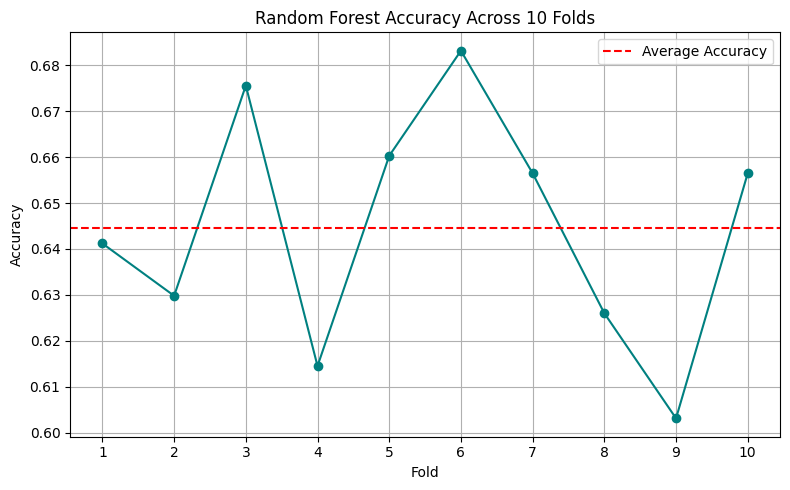

In [4]:
accuracies = [0.6412, 0.6298, 0.6756, 0.6145, 0.6603, 0.6832, 0.6565, 0.6260, 0.6031, 0.6565]

plt.figure(figsize=(8,5))
plt.plot(range(1,11), accuracies, marker='o', linestyle='-', color='teal')
plt.axhline(y=sum(accuracies)/len(accuracies), color='red', linestyle='--', label='Average Accuracy')
plt.title('Random Forest Accuracy Across 10 Folds')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.xticks(range(1,11))
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('accuracy_per_fold.png')
plt.show()

In [17]:
# FINAL MODEL EVALUATION SET

rfd_pipeline.fit(trainX_full, trainY_full)
y_test_predict = rfd_pipeline.predict(testX)

# classification report
class_report = classification_report(testY, y_test_predict)

# accuracy score
ac = accuracy_score(testY, y_test_predict)

# confusion matrix
cm = confusion_matrix(testY, y_test_predict)

if cm.shape == (2,2):
    tp, fn, fp, tn = cm.ravel()
else:
    tp = fn = fp = tn = 0

# metrics
precision = tp / (tp + fp) if (tp + fp) != 0 else 0
recall = tp / (tp + fn) if (tp + fn) != 0 else 0
specificity = tn / (fp + tn) if (fp + tn) != 0 else 0
f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

# append this for visualization
accuracy_summary.append({
    "Model": "Random Forest Classifier",
    "Test Accuracy": ac
})

precision_summary.append({
    "Model": "Random Forest Classifier",
    "Precision": precision
})

recall_summary.append({
    "Model":"Random Forest Classifier",
    "Recall": recall
})

specificity_summary.append({
    "Model":"Random Forest Classifier",
    "Specificity": specificity
})

f1_summary.append({
    "Model":"Random Forest Classifier",
    "F1 Score": f1
})

print('\nFinal Evaluation on Test Set using Random Forest Classifier:')
print('Confusion Matrix:\n', cm)
print('Classification Report:\n', class_report)
print("Test Accuracy:", ac)


Final Evaluation on Test Set using Random Forest Classifier:
Confusion Matrix:
 [[303 109]
 [126 118]]
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.74      0.72       412
           1       0.52      0.48      0.50       244

    accuracy                           0.64       656
   macro avg       0.61      0.61      0.61       656
weighted avg       0.64      0.64      0.64       656

Test Accuracy: 0.6417682926829268


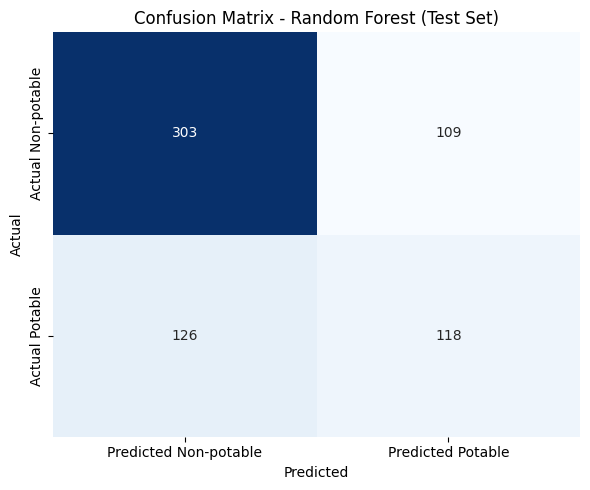

In [7]:
cm = [[303, 109],
      [126, 118]]

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Non-potable', 'Predicted Potable'],
            yticklabels=['Actual Non-potable', 'Actual Potable'])
plt.title('Confusion Matrix - Random Forest (Test Set)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.savefig('confusion_matrix_testset.png')
plt.show()

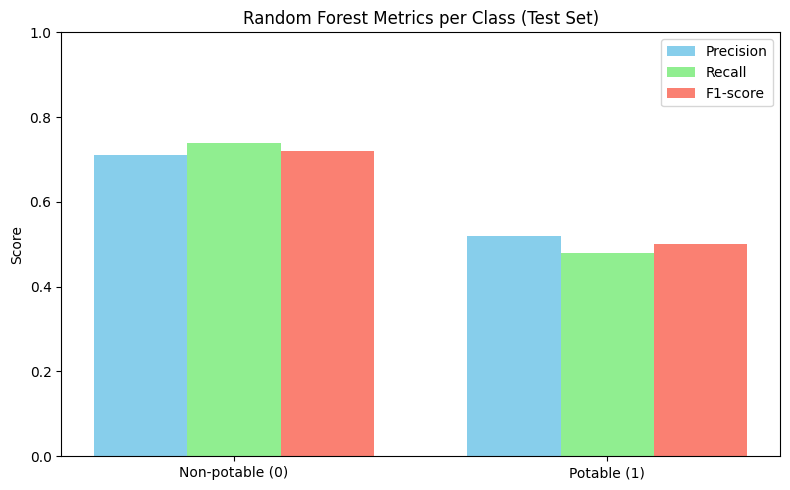

In [5]:
# Scores from test set classification report
labels = ['Non-potable (0)', 'Potable (1)']
precision = [0.71, 0.52]
recall = [0.74, 0.48]
f1_score = [0.72, 0.50]

x = np.arange(len(labels))  # label locations
width = 0.25  # width of bars

plt.figure(figsize=(8,5))
plt.bar(x - width, precision, width, label='Precision', color='skyblue')
plt.bar(x, recall, width, label='Recall', color='lightgreen')
plt.bar(x + width, f1_score, width, label='F1-score', color='salmon')

plt.ylabel('Score')
plt.title('Random Forest Metrics per Class (Test Set)')
plt.xticks(x, labels)
plt.ylim(0, 1)
plt.legend()
plt.tight_layout()
plt.savefig('metrics_per_class_testset.png')
plt.show()


### Decision Tree Classification

In [18]:
# PIPELINE FOR DECISION TREE

dt_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('classifier', DecisionTreeClassifier(random_state=42)),
])

In [19]:
# CROSS VALIDATION
dt_accuracies = []

for fold, (train_idx, val_idx) in enumerate(skf.split(trainX_full, trainY_full), 1):
    trainX = trainX_full.iloc[train_idx]
    x_val = trainX_full.iloc[val_idx]
    trainY = trainY_full.iloc[train_idx]
    y_val = trainY_full.iloc[val_idx]

    # fit pipelines on training fold
    dt_pipeline.fit(trainX, trainY)

    # predict on validation fold
    predictY = dt_pipeline.predict(x_val)

    # report metrics
    print(f"\n--- Fold {fold} ---")
    print("Confusion Matrix:\n", confusion_matrix(y_val, predictY))
    print("Classification Report:\n", classification_report(y_val, predictY))
    acc = accuracy_score(y_val, predictY)
    print("Accuracy:", acc)
    dt_accuracies.append(acc)

# OVERALL CROSS VALIDATION SCORE
print("\nAverage Cross Validation Accuracy:", np.mean(dt_accuracies))



--- Fold 1 ---
Confusion Matrix:
 [[88 71]
 [42 61]]
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.55      0.61       159
           1       0.46      0.59      0.52       103

    accuracy                           0.57       262
   macro avg       0.57      0.57      0.56       262
weighted avg       0.59      0.57      0.57       262

Accuracy: 0.5687022900763359

--- Fold 2 ---
Confusion Matrix:
 [[98 61]
 [51 52]]
Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.62      0.64       159
           1       0.46      0.50      0.48       103

    accuracy                           0.57       262
   macro avg       0.56      0.56      0.56       262
weighted avg       0.58      0.57      0.58       262

Accuracy: 0.5725190839694656

--- Fold 3 ---
Confusion Matrix:
 [[91 68]
 [50 53]]
Classification Report:
               precision    recall  f1-score   support


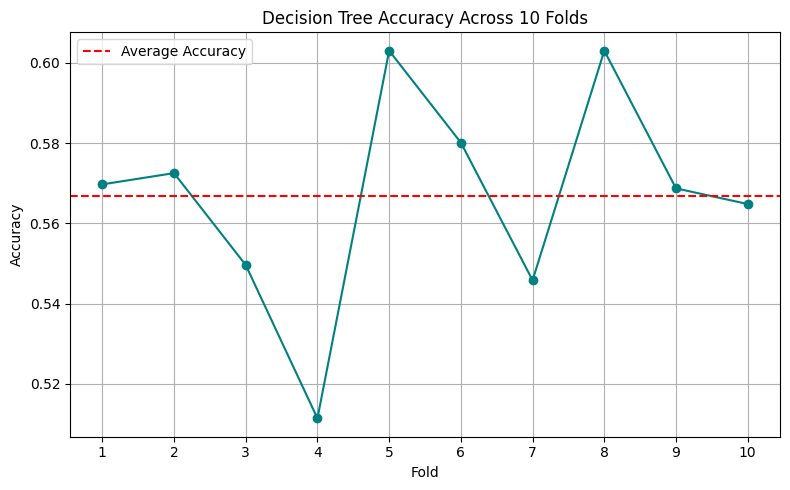

In [14]:
accuracies = [0.5697, 0.5725, 0.5496, 0.5114, 0.6030, 0.5801, 0.5458, 0.6030, 0.5687, 0.5648]

plt.figure(figsize=(8,5))
plt.plot(range(1,11), accuracies, marker='o', linestyle='-', color='teal')
plt.axhline(y=sum(accuracies)/len(accuracies), color='red', linestyle='--', label='Average Accuracy')
plt.title('Decision Tree Accuracy Across 10 Folds')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.xticks(range(1,11))
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('accuracy_per_fold.png')
plt.show()
plt.show()

In [20]:
# FINAL MODEL EVALUATION SET

dt_pipeline.fit(trainX_full, trainY_full)
y_test_predict = dt_pipeline.predict(testX)

# classification report
class_report = classification_report(testY, y_test_predict)

# accuracy score
ac = accuracy_score(testY, y_test_predict)

# confusion matrix
cm = confusion_matrix(testY, y_test_predict)

if cm.shape == (2,2):
    tp, fn, fp, tn = cm.ravel()
else:
    tp = fn = fp = tn = 0

# metrics
precision = tp / (tp + fp) if (tp + fp) != 0 else 0
recall = tp / (tp + fn) if (tp + fn) != 0 else 0
specificity = tn / (fp + tn) if (fp + tn) != 0 else 0
f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

# append this for visualization
accuracy_summary.append({
    "Model": "Decision Tree Classifier",
    "Test Accuracy": ac
})

precision_summary.append({
    "Model": "Decision Tree Classifier",
    "Precision": precision
})

recall_summary.append({
    "Model":"Decision Tree Classifier",
    "Recall": recall
})

specificity_summary.append({
    "Model":"Decision Tree Classifier",
    "Specificity": specificity
})

f1_summary.append({
    "Model":"Decision Tree Classifier",
    "F1 Score": f1
})

print('\nFinal Evaluation on Test Set using Decision Tree Classifier:')
print('Confusion Matrix:\n', cm)
print('Classification Report:\n', class_report)
print("Test Accuracy:", ac)


Final Evaluation on Test Set using Decision Tree Classifier:
Confusion Matrix:
 [[256 156]
 [117 127]]
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.62      0.65       412
           1       0.45      0.52      0.48       244

    accuracy                           0.58       656
   macro avg       0.57      0.57      0.57       656
weighted avg       0.60      0.58      0.59       656

Test Accuracy: 0.5838414634146342


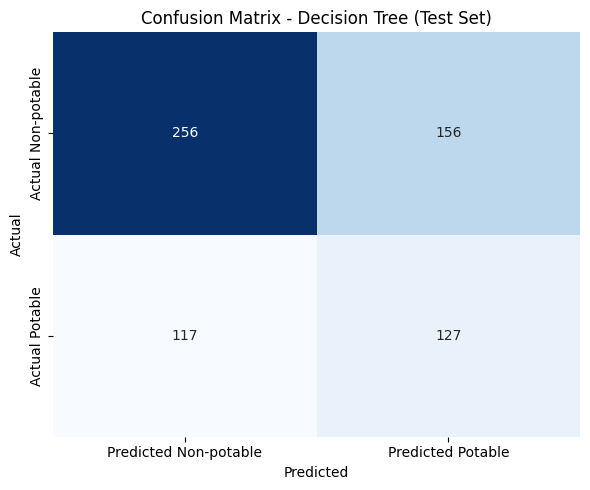

In [15]:
cm = [[256, 156],
      [117, 127]]

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Non-potable', 'Predicted Potable'],
            yticklabels=['Actual Non-potable', 'Actual Potable'])
plt.title('Confusion Matrix - Decision Tree (Test Set)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.savefig('confusion_matrix_testset.png')
plt.show()

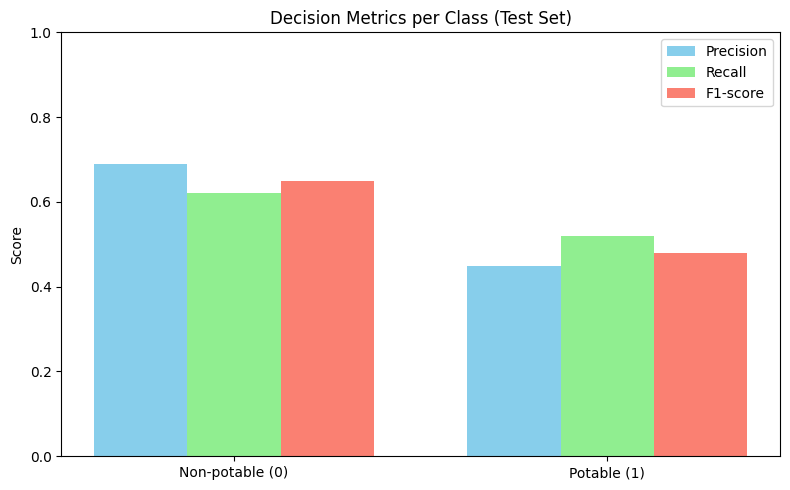

In [16]:
labels = ['Non-potable (0)', 'Potable (1)']
precision = [0.69, 0.45]
recall = [0.62, 0.52]
f1_score = [0.65, 0.48]

x = np.arange(len(labels))  # label locations
width = 0.25  # width of bars

plt.figure(figsize=(8,5))
plt.bar(x - width, precision, width, label='Precision', color='skyblue')
plt.bar(x, recall, width, label='Recall', color='lightgreen')
plt.bar(x + width, f1_score, width, label='F1-score', color='salmon')

plt.ylabel('Score')
plt.title('Decision Metrics per Class (Test Set)')
plt.xticks(x, labels)
plt.ylim(0, 1)
plt.legend()
plt.tight_layout()
plt.savefig('metrics_per_class_testset.png')
plt.show()

### KNN

In [21]:
# PIPELINE FOR KNN

knn_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('classifier', KNeighborsClassifier(n_neighbors=2)),
])

In [22]:
# CROSS VALIDATION
knn_accuracies = []

for fold, (train_idx, val_idx) in enumerate(skf.split(trainX_full, trainY_full), 1):
    trainX = trainX_full.iloc[train_idx]
    x_val = trainX_full.iloc[val_idx]
    trainY = trainY_full.iloc[train_idx]
    y_val = trainY_full.iloc[val_idx]

    # fit pipelines on training fold
    knn_pipeline.fit(trainX, trainY)

    # predict on validation fold
    predictY = knn_pipeline.predict(x_val)

    # report metrics
    print(f"\n--- Fold {fold} ---")
    print("Confusion Matrix:\n", confusion_matrix(y_val, predictY))
    print("Classification Report:\n", classification_report(y_val, predictY))
    acc = accuracy_score(y_val, predictY)
    print("Accuracy:", acc)
    knn_accuracies.append(acc)

# OVERALL CROSS VALIDATION SCORE
print("\nAverage Cross Validation Accuracy:", np.mean(knn_accuracies))



--- Fold 1 ---
Confusion Matrix:
 [[125  34]
 [ 70  33]]
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.79      0.71       159
           1       0.49      0.32      0.39       103

    accuracy                           0.60       262
   macro avg       0.57      0.55      0.55       262
weighted avg       0.58      0.60      0.58       262

Accuracy: 0.6030534351145038

--- Fold 2 ---
Confusion Matrix:
 [[122  37]
 [ 70  33]]
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.77      0.70       159
           1       0.47      0.32      0.38       103

    accuracy                           0.59       262
   macro avg       0.55      0.54      0.54       262
weighted avg       0.57      0.59      0.57       262

Accuracy: 0.5916030534351145

--- Fold 3 ---
Confusion Matrix:
 [[136  23]
 [ 75  28]]
Classification Report:
               precision    recall  f1-scor

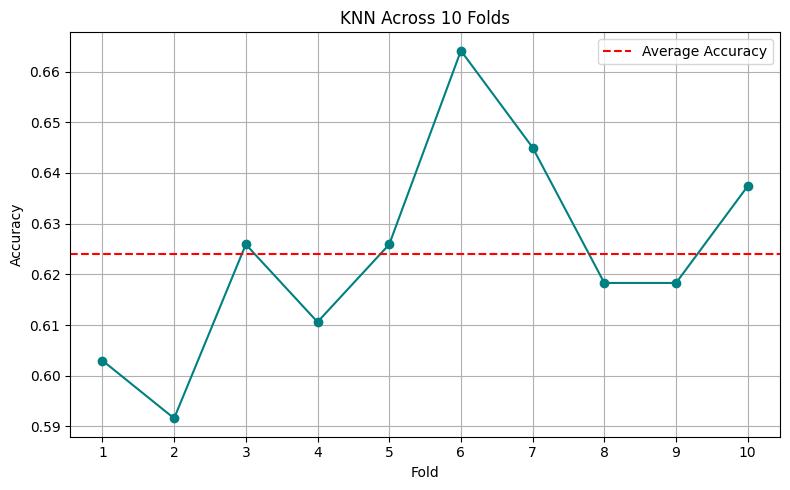

In [18]:
accuracies = [0.6030, 0.5916, 0.6259, 0.6106, 0.6259, 0.6641, 0.6450, 0.6183, 0.6183, 0.6374]

plt.figure(figsize=(8,5))
plt.plot(range(1,11), accuracies, marker='o', linestyle='-', color='teal')
plt.axhline(y=sum(accuracies)/len(accuracies), color='red', linestyle='--', label='Average Accuracy')
plt.title('KNN Across 10 Folds')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.xticks(range(1,11))
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('accuracy_per_fold.png')
plt.show()
plt.show()

In [23]:
# FINAL MODEL EVALUATION SET

knn_pipeline.fit(trainX_full, trainY_full)
y_test_predict = knn_pipeline.predict(testX)

# classification report
class_report = classification_report(testY, y_test_predict)

# accuracy score
ac = accuracy_score(testY, y_test_predict)

# confusion matrix
cm = confusion_matrix(testY, y_test_predict)

if cm.shape == (2,2):
    tp, fn, fp, tn = cm.ravel()
else:
    tp = fn = fp = tn = 0

# metrics
precision = tp / (tp + fp) if (tp + fp) != 0 else 0
recall = tp / (tp + fn) if (tp + fn) != 0 else 0
specificity = tn / (fp + tn) if (fp + tn) != 0 else 0
f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

# append this for visualization
accuracy_summary.append({
    "Model": "KNN",
    "Test Accuracy": ac
})

precision_summary.append({
    "Model": "KNN",
    "Precision": precision
})

recall_summary.append({
    "Model":"KNN",
    "Recall": recall
})

specificity_summary.append({
    "Model":"KNN",
    "Specificity": specificity
})

f1_summary.append({
    "Model":"KNN",
    "F1 Score": f1
})

print('\nFinal Evaluation on Test Set using KNN:')
print('Confusion Matrix:\n', cm)
print('Classification Report:\n', class_report)
print("Test Accuracy:", ac)


Final Evaluation on Test Set using KNN:
Confusion Matrix:
 [[336  76]
 [161  83]]
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.82      0.74       412
           1       0.52      0.34      0.41       244

    accuracy                           0.64       656
   macro avg       0.60      0.58      0.58       656
weighted avg       0.62      0.64      0.62       656

Test Accuracy: 0.6387195121951219


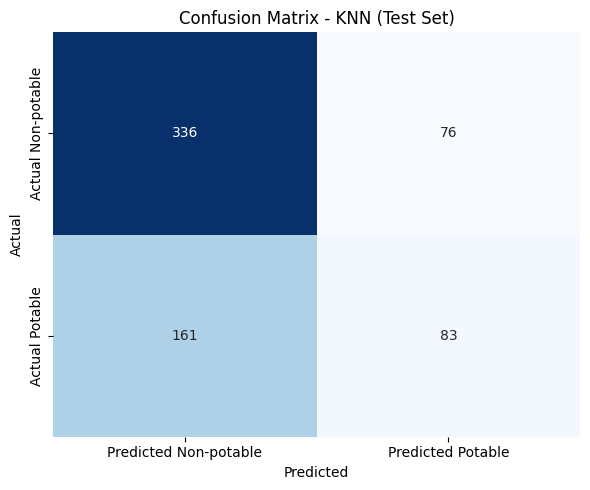

In [20]:
cm = [[336, 76],
      [161, 83]]

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Non-potable', 'Predicted Potable'],
            yticklabels=['Actual Non-potable', 'Actual Potable'])
plt.title('Confusion Matrix - KNN (Test Set)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.savefig('confusion_matrix_testset.png')

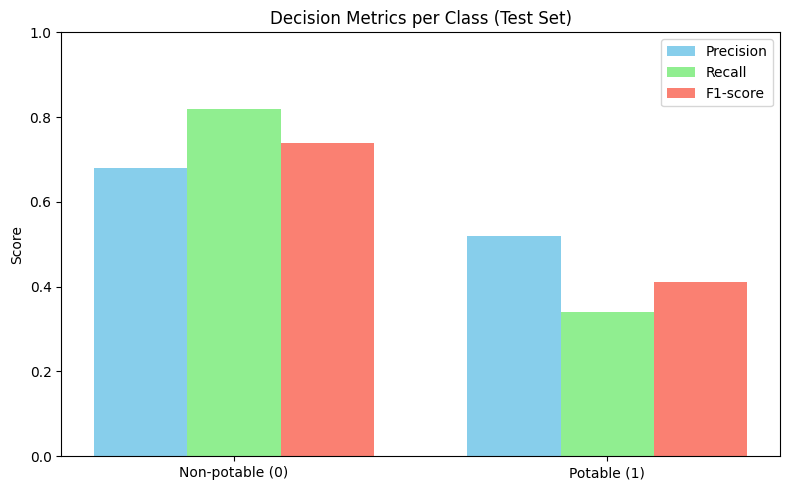

In [21]:
labels = ['Non-potable (0)', 'Potable (1)']
precision = [0.68, 0.52]
recall = [0.82, 0.34]
f1_score = [0.74, 0.41]

x = np.arange(len(labels))  # label locations
width = 0.25  # width of bars

plt.figure(figsize=(8,5))
plt.bar(x - width, precision, width, label='Precision', color='skyblue')
plt.bar(x, recall, width, label='Recall', color='lightgreen')
plt.bar(x + width, f1_score, width, label='F1-score', color='salmon')

plt.ylabel('Score')
plt.title('Decision Metrics per Class (Test Set)')
plt.xticks(x, labels)
plt.ylim(0, 1)
plt.legend()
plt.tight_layout()
plt.savefig('metrics_per_class_testset.png')
plt.show()

### Logistic Regression

In [24]:
# PIPELINE FOR LOGISTIC REGRESSION

logRes_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('classifier', LogisticRegression(random_state=42)),
])

In [25]:
# CROSS VALIDATION
logRes_accuracies = []

for fold, (train_idx, val_idx) in enumerate(skf.split(trainX_full, trainY_full), 1):
    trainX = trainX_full.iloc[train_idx]
    x_val = trainX_full.iloc[val_idx]
    trainY = trainY_full.iloc[train_idx]
    y_val = trainY_full.iloc[val_idx]

    # fit pipelines on training fold
    logRes_pipeline.fit(trainX, trainY)

    # predict on validation fold
    predictY = logRes_pipeline.predict(x_val)

    # report metrics
    print(f"\n--- Fold {fold} ---")
    print("Confusion Matrix:\n", confusion_matrix(y_val, predictY))
    print("Classification Report:\n", classification_report(y_val, predictY))
    acc = accuracy_score(y_val, predictY)
    print("Accuracy:", acc)
    logRes_accuracies.append(acc)

# OVERALL CROSS VALIDATION SCORE
print("\nAverage Cross Validation Accuracy:", np.mean(logRes_accuracies))



--- Fold 1 ---
Confusion Matrix:
 [[80 79]
 [50 53]]
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.50      0.55       159
           1       0.40      0.51      0.45       103

    accuracy                           0.51       262
   macro avg       0.51      0.51      0.50       262
weighted avg       0.53      0.51      0.51       262

Accuracy: 0.5076335877862596

--- Fold 2 ---
Confusion Matrix:
 [[84 75]
 [56 47]]
Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.53      0.56       159
           1       0.39      0.46      0.42       103

    accuracy                           0.50       262
   macro avg       0.49      0.49      0.49       262
weighted avg       0.52      0.50      0.51       262

Accuracy: 0.5

--- Fold 3 ---
Confusion Matrix:
 [[76 83]
 [55 48]]
Classification Report:
               precision    recall  f1-score   support

           0  

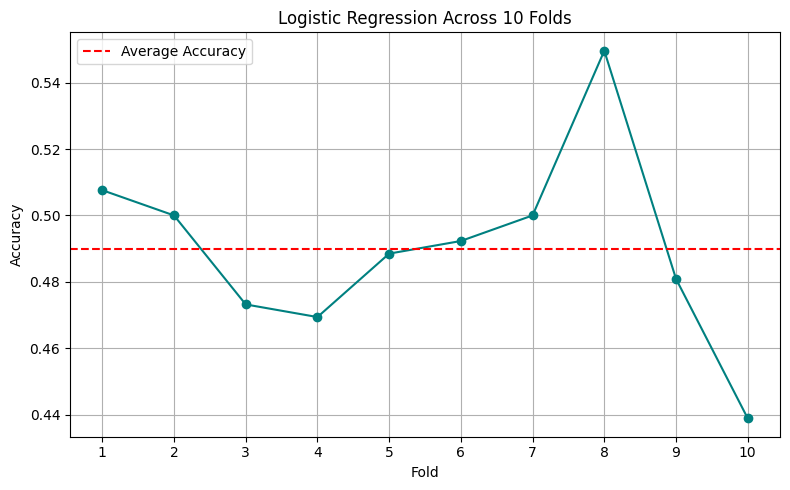

In [26]:
accuracies = [0.5076, 0.5, 0.4732, 0.4694, 0.4885, 0.4923, 0.5, 0.5496, 0.4809, 0.4389]

plt.figure(figsize=(8,5))
plt.plot(range(1,11), accuracies, marker='o', linestyle='-', color='teal')
plt.axhline(y=sum(accuracies)/len(accuracies), color='red', linestyle='--', label='Average Accuracy')
plt.title('Logistic Regression Across 10 Folds')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.xticks(range(1,11))
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('accuracy_per_fold.png')
plt.show()
plt.show()

In [26]:
# FINAL MODEL EVALUATION SET

logRes_pipeline.fit(trainX_full, trainY_full)
y_test_predict = logRes_pipeline.predict(testX)

# classification report
class_report = classification_report(testY, y_test_predict)

# accuracy score
ac = accuracy_score(testY, y_test_predict)

# confusion matrix
cm = confusion_matrix(testY, y_test_predict)

if cm.shape == (2,2):
    tp, fn, fp, tn = cm.ravel()
else:
    tp = fn = fp = tn = 0

# metrics
precision = tp / (tp + fp) if (tp + fp) != 0 else 0
recall = tp / (tp + fn) if (tp + fn) != 0 else 0
specificity = tn / (fp + tn) if (fp + tn) != 0 else 0
f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

# append this for visualization
accuracy_summary.append({
    "Model": "Logistic Regression",
    "Test Accuracy": ac
})

precision_summary.append({
    "Model": "Logistic Regression",
    "Precision": precision
})

recall_summary.append({
    "Model":"Logistic Regression",
    "Recall": recall
})

specificity_summary.append({
    "Model":"Logistic Regression",
    "Specificity": specificity
})

f1_summary.append({
    "Model":"Logistic Regression",
    "F1 Score": f1
})

print('\nFinal Evaluation on Test Set using Logistic Regression:')
print('Confusion Matrix:\n', cm)
print('Classification Report:\n', class_report)
print("Test Accuracy:", ac)


Final Evaluation on Test Set using Logistic Regression:
Confusion Matrix:
 [[211 201]
 [129 115]]
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.51      0.56       412
           1       0.36      0.47      0.41       244

    accuracy                           0.50       656
   macro avg       0.49      0.49      0.49       656
weighted avg       0.53      0.50      0.51       656

Test Accuracy: 0.4969512195121951


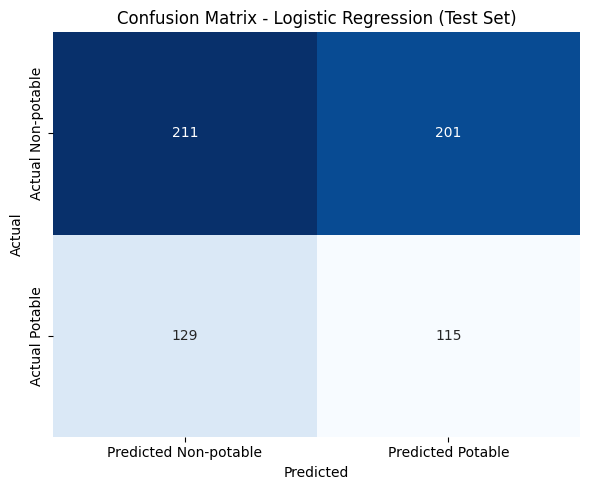

In [24]:
cm = [[211, 201],
      [129, 115]]

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Non-potable', 'Predicted Potable'],
            yticklabels=['Actual Non-potable', 'Actual Potable'])
plt.title('Confusion Matrix - Logistic Regression (Test Set)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.savefig('confusion_matrix_testset.png')

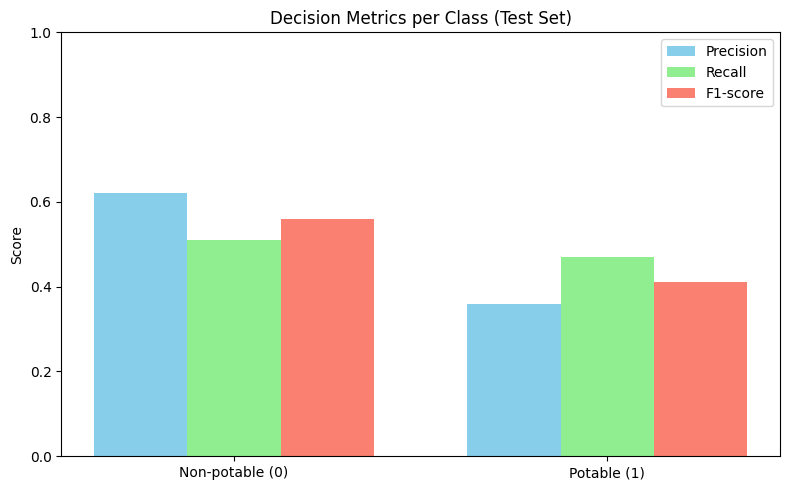

In [25]:
labels = ['Non-potable (0)', 'Potable (1)']
precision = [0.62, 0.36]
recall = [0.51, 0.47]
f1_score = [0.56, 0.41]

x = np.arange(len(labels))  # label locations
width = 0.25  # width of bars

plt.figure(figsize=(8,5))
plt.bar(x - width, precision, width, label='Precision', color='skyblue')
plt.bar(x, recall, width, label='Recall', color='lightgreen')
plt.bar(x + width, f1_score, width, label='F1-score', color='salmon')

plt.ylabel('Score')
plt.title('Decision Metrics per Class (Test Set)')
plt.xticks(x, labels)
plt.ylim(0, 1)
plt.legend()
plt.tight_layout()
plt.savefig('metrics_per_class_testset.png')
plt.show()

### SVM

In [27]:
# PIPELINE FOR SVM

svm_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('classifier', SVC(kernel='linear')),
])

In [28]:
# CROSS VALIDATION
svm_accuracies = []

for fold, (train_idx, val_idx) in enumerate(skf.split(trainX_full, trainY_full), 1):
    trainX = trainX_full.iloc[train_idx]
    x_val = trainX_full.iloc[val_idx]
    trainY = trainY_full.iloc[train_idx]
    y_val = trainY_full.iloc[val_idx]

    # fit pipelines on training fold
    svm_pipeline.fit(trainX, trainY)

    # predict on validation fold
    predictY = svm_pipeline.predict(x_val)

    # report metrics
    print(f"\n--- Fold {fold} ---")
    print("Confusion Matrix:\n", confusion_matrix(y_val, predictY))
    print("Classification Report:\n", classification_report(y_val, predictY))
    acc = accuracy_score(y_val, predictY)
    print("Accuracy:", acc)
    svm_accuracies.append(acc)

# OVERALL CROSS VALIDATION SCORE
print("\nAverage Cross Validation Accuracy:", np.mean(svm_accuracies))



--- Fold 1 ---
Confusion Matrix:
 [[85 74]
 [54 49]]
Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.53      0.57       159
           1       0.40      0.48      0.43       103

    accuracy                           0.51       262
   macro avg       0.50      0.51      0.50       262
weighted avg       0.53      0.51      0.52       262

Accuracy: 0.5114503816793893

--- Fold 2 ---
Confusion Matrix:
 [[89 70]
 [57 46]]
Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.56      0.58       159
           1       0.40      0.45      0.42       103

    accuracy                           0.52       262
   macro avg       0.50      0.50      0.50       262
weighted avg       0.53      0.52      0.52       262

Accuracy: 0.5152671755725191

--- Fold 3 ---
Confusion Matrix:
 [[86 73]
 [62 41]]
Classification Report:
               precision    recall  f1-score   support


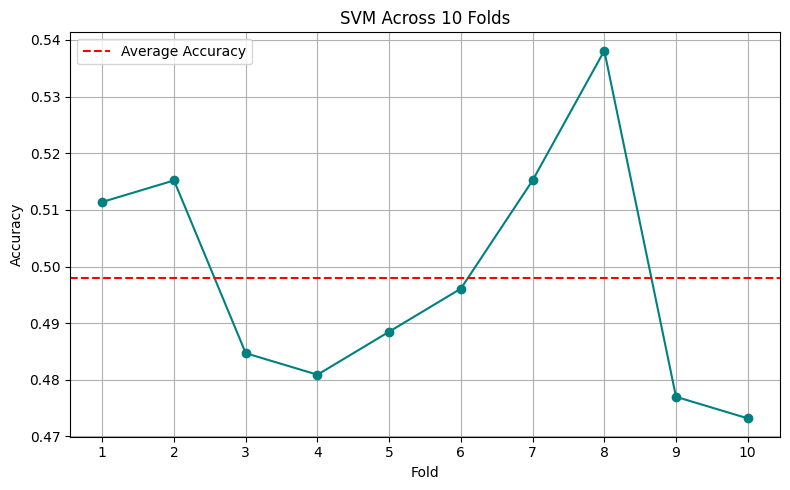

In [27]:
accuracies = [0.5114, 0.5152, 0.4847, 0.4809, 0.4885, 0.4961, 0.5152, 0.5381, 0.4770, 0.4732]

plt.figure(figsize=(8,5))
plt.plot(range(1,11), accuracies, marker='o', linestyle='-', color='teal')
plt.axhline(y=sum(accuracies)/len(accuracies), color='red', linestyle='--', label='Average Accuracy')
plt.title('SVM Across 10 Folds')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.xticks(range(1,11))
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('accuracy_per_fold.png')
plt.show()
plt.show()

In [29]:
# FINAL MODEL EVALUATION SET

svm_pipeline.fit(trainX_full, trainY_full)
y_test_predict = svm_pipeline.predict(testX)

# classification report
class_report = classification_report(testY, y_test_predict)

# accuracy score
ac = accuracy_score(testY, y_test_predict)

# confusion matrix
cm = confusion_matrix(testY, y_test_predict)

if cm.shape == (2,2):
    tp, fn, fp, tn = cm.ravel()
else:
    tp = fn = fp = tn = 0

# metrics
precision = tp / (tp + fp) if (tp + fp) != 0 else 0
recall = tp / (tp + fn) if (tp + fn) != 0 else 0
specificity = tn / (fp + tn) if (fp + tn) != 0 else 0
f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

# append this for visualization
accuracy_summary.append({
    "Model": "SVM",
    "Test Accuracy": ac
})

precision_summary.append({
    "Model": "SVM",
    "Precision": precision
})

recall_summary.append({
    "Model":"SVM",
    "Recall": recall
})

specificity_summary.append({
    "Model":"SVM",
    "Specificity": specificity
})

f1_summary.append({
    "Model":"SVM",
    "F1 Score": f1
})

print('\nFinal Evaluation on Test Set using SVM:')
print('Confusion Matrix:\n', cm)
print('Classification Report:\n', class_report)
print("Test Accuracy:", ac)


Final Evaluation on Test Set using SVM:
Confusion Matrix:
 [[229 183]
 [136 108]]
Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.56      0.59       412
           1       0.37      0.44      0.40       244

    accuracy                           0.51       656
   macro avg       0.50      0.50      0.50       656
weighted avg       0.53      0.51      0.52       656

Test Accuracy: 0.5137195121951219


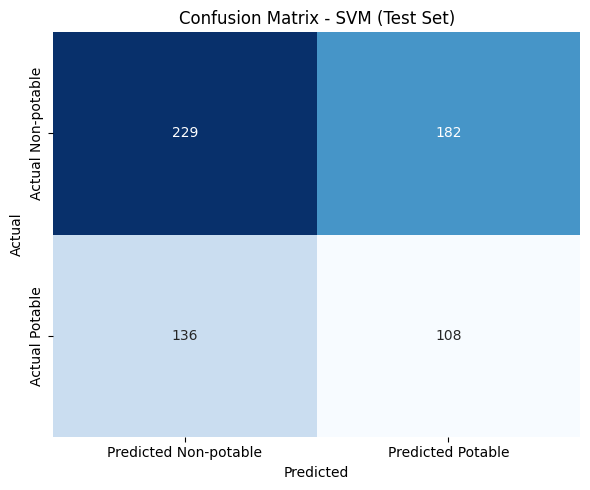

In [28]:
cm = [[229, 182],
      [136, 108]]

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Non-potable', 'Predicted Potable'],
            yticklabels=['Actual Non-potable', 'Actual Potable'])
plt.title('Confusion Matrix - SVM (Test Set)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.savefig('confusion_matrix_testset.png')

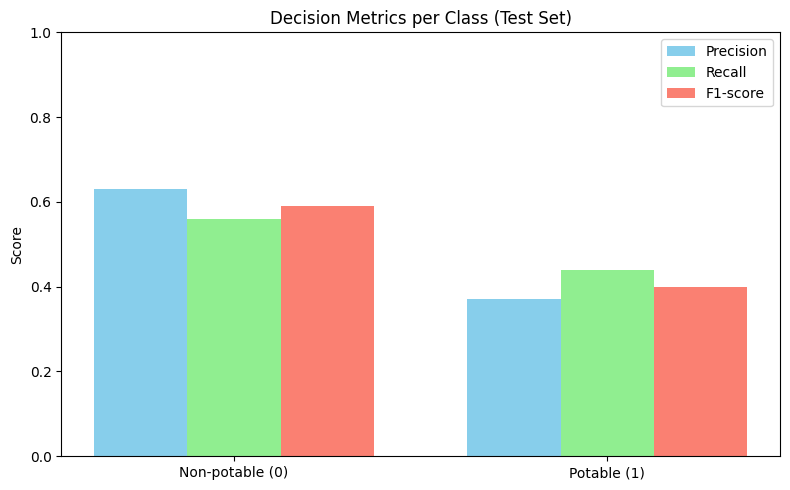

In [29]:
labels = ['Non-potable (0)', 'Potable (1)']
precision = [0.63, 0.37]
recall = [0.56, 0.44]
f1_score = [0.59, 0.40]

x = np.arange(len(labels))  # label locations
width = 0.25  # width of bars

plt.figure(figsize=(8,5))
plt.bar(x - width, precision, width, label='Precision', color='skyblue')
plt.bar(x, recall, width, label='Recall', color='lightgreen')
plt.bar(x + width, f1_score, width, label='F1-score', color='salmon')

plt.ylabel('Score')
plt.title('Decision Metrics per Class (Test Set)')
plt.xticks(x, labels)
plt.ylim(0, 1)
plt.legend()
plt.tight_layout()
plt.savefig('metrics_per_class_testset.png')
plt.show()

### Naive Bayes

In [30]:
# PIPELINE FOR Naive Bayes

nb_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('classifier', GaussianNB()),
])

In [31]:
# CROSS VALIDATION
nb_accuracies = []

for fold, (train_idx, val_idx) in enumerate(skf.split(trainX_full, trainY_full), 1):
    trainX = trainX_full.iloc[train_idx]
    x_val = trainX_full.iloc[val_idx]
    trainY = trainY_full.iloc[train_idx]
    y_val = trainY_full.iloc[val_idx]

    # fit pipelines on training fold
    nb_pipeline.fit(trainX, trainY)

    # predict on validation fold
    predictY = nb_pipeline.predict(x_val)

    # report metrics
    print(f"\n--- Fold {fold} ---")
    print("Confusion Matrix:\n", confusion_matrix(y_val, predictY))
    print("Classification Report:\n", classification_report(y_val, predictY))
    acc = accuracy_score(y_val, predictY)
    print("Accuracy:", acc)
    nb_accuracies.append(acc)

# OVERALL CROSS VALIDATION SCORE
print("\nAverage Cross Validation Accuracy:", np.mean(nb_accuracies))



--- Fold 1 ---
Confusion Matrix:
 [[101  58]
 [ 53  50]]
Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.64      0.65       159
           1       0.46      0.49      0.47       103

    accuracy                           0.58       262
   macro avg       0.56      0.56      0.56       262
weighted avg       0.58      0.58      0.58       262

Accuracy: 0.5763358778625954

--- Fold 2 ---
Confusion Matrix:
 [[95 64]
 [42 61]]
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.60      0.64       159
           1       0.49      0.59      0.54       103

    accuracy                           0.60       262
   macro avg       0.59      0.59      0.59       262
weighted avg       0.61      0.60      0.60       262

Accuracy: 0.5954198473282443

--- Fold 3 ---
Confusion Matrix:
 [[101  58]
 [ 49  54]]
Classification Report:
               precision    recall  f1-score   

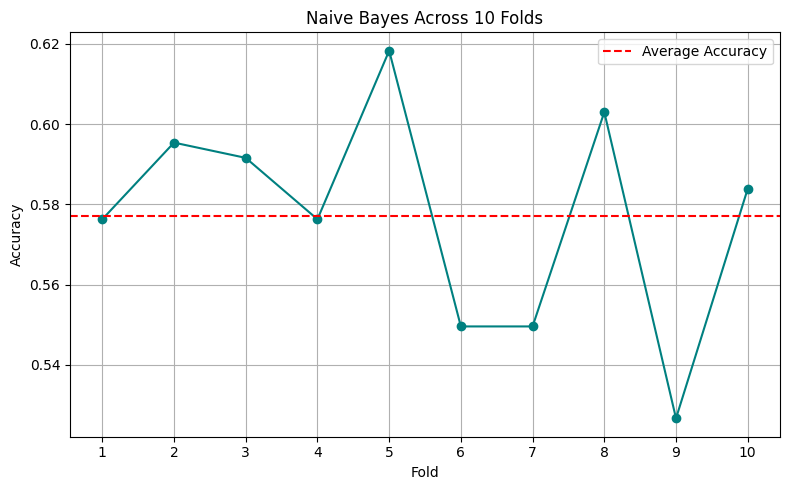

In [38]:
accuracies = [0.5763, 0.5954, 0.5916, 0.5763, 0.6183, 0.5496, 0.5496, 0.6030, 0.5267, 0.5839]

plt.figure(figsize=(8,5))
plt.plot(range(1,11), accuracies, marker='o', linestyle='-', color='teal')
plt.axhline(y=sum(accuracies)/len(accuracies), color='red', linestyle='--', label='Average Accuracy')
plt.title('Naive Bayes Across 10 Folds')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.xticks(range(1,11))
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('accuracy_per_fold.png')
plt.show()
plt.show()

In [32]:
# FINAL MODEL EVALUATION SET

nb_pipeline.fit(trainX_full, trainY_full)
y_test_predict = nb_pipeline.predict(testX)

# classification report
class_report = classification_report(testY, y_test_predict)

# accuracy score
ac = accuracy_score(testY, y_test_predict)

# confusion matrix
cm = confusion_matrix(testY, y_test_predict)

if cm.shape == (2,2):
    tp, fn, fp, tn = cm.ravel()
else:
    tp = fn = fp = tn = 0

# metrics
precision = tp / (tp + fp) if (tp + fp) != 0 else 0
recall = tp / (tp + fn) if (tp + fn) != 0 else 0
specificity = tn / (fp + tn) if (fp + tn) != 0 else 0
f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

# append this for visualization
accuracy_summary.append({
    "Model": "Naive Bayes",
    "Test Accuracy": ac
})

precision_summary.append({
    "Model": "Naive Bayes",
    "Precision": precision
})

recall_summary.append({
    "Model":"Naive Bayes",
    "Recall": recall
})

specificity_summary.append({
    "Model":"Naive Bayes",
    "Specificity": specificity
})

f1_summary.append({
    "Model":"Naive Bayes",
    "F1 Score": f1
})

print('\nFinal Evaluation on Test Set using Naive Bayes:')
print('Confusion Matrix:\n', cm)
print('Classification Report:\n', class_report)
print("Test Accuracy:", ac)


Final Evaluation on Test Set using Naive Bayes:
Confusion Matrix:
 [[274 138]
 [133 111]]
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.67      0.67       412
           1       0.45      0.45      0.45       244

    accuracy                           0.59       656
   macro avg       0.56      0.56      0.56       656
weighted avg       0.59      0.59      0.59       656

Test Accuracy: 0.586890243902439


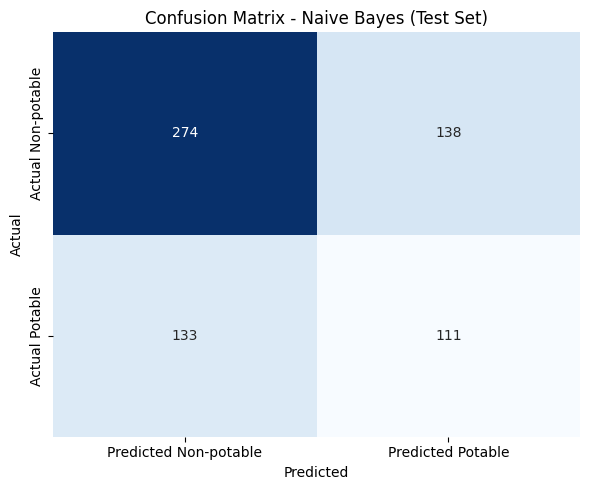

In [32]:
cm = [[274, 138],
      [133, 111]]

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Non-potable', 'Predicted Potable'],
            yticklabels=['Actual Non-potable', 'Actual Potable'])
plt.title('Confusion Matrix - Naive Bayes (Test Set)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.savefig('confusion_matrix_testset.png')

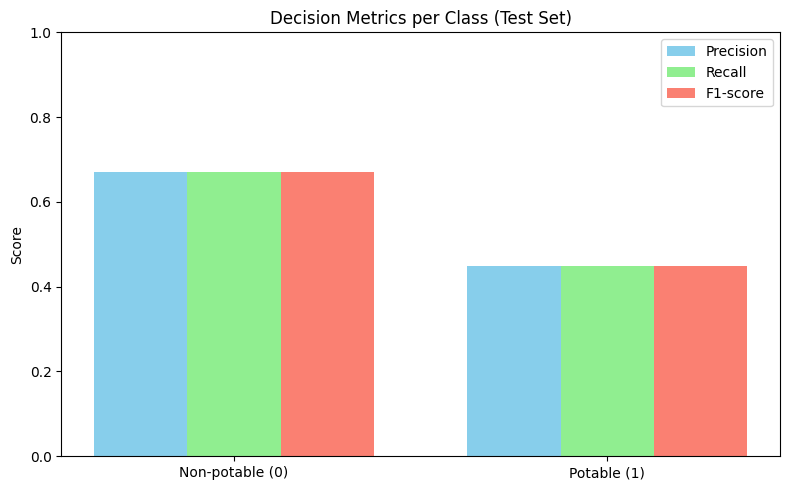

In [33]:
labels = ['Non-potable (0)', 'Potable (1)']
precision = [0.67, 0.45]
recall = [0.67, 0.45]
f1_score = [0.67, 0.45]

x = np.arange(len(labels))  # label locations
width = 0.25  # width of bars

plt.figure(figsize=(8,5))
plt.bar(x - width, precision, width, label='Precision', color='skyblue')
plt.bar(x, recall, width, label='Recall', color='lightgreen')
plt.bar(x + width, f1_score, width, label='F1-score', color='salmon')

plt.ylabel('Score')
plt.title('Decision Metrics per Class (Test Set)')
plt.xticks(x, labels)
plt.ylim(0, 1)
plt.legend()
plt.tight_layout()
plt.savefig('metrics_per_class_testset.png')
plt.show()

### Gradient Boosting

In [33]:
# PIPELINE FOR Gradient Boosting

gb_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('classifier', GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)),
])

In [34]:
# CROSS VALIDATION
gb_accuracies = []

for fold, (train_idx, val_idx) in enumerate(skf.split(trainX_full, trainY_full), 1):
    trainX = trainX_full.iloc[train_idx]
    x_val = trainX_full.iloc[val_idx]
    trainY = trainY_full.iloc[train_idx]
    y_val = trainY_full.iloc[val_idx]

    # fit pipelines on training fold
    gb_pipeline.fit(trainX, trainY)

    # predict on validation fold
    predictY = gb_pipeline.predict(x_val)

    # report metrics
    print(f"\n--- Fold {fold} ---")
    print("Confusion Matrix:\n", confusion_matrix(y_val, predictY))
    print("Classification Report:\n", classification_report(y_val, predictY))
    acc = accuracy_score(y_val, predictY)
    print("Accuracy:", acc)
    gb_accuracies.append(acc)

# OVERALL CROSS VALIDATION SCORE
print("\nAverage Cross Validation Accuracy:", np.mean(gb_accuracies))



--- Fold 1 ---
Confusion Matrix:
 [[105  54]
 [ 42  61]]
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.66      0.69       159
           1       0.53      0.59      0.56       103

    accuracy                           0.63       262
   macro avg       0.62      0.63      0.62       262
weighted avg       0.64      0.63      0.64       262

Accuracy: 0.6335877862595419

--- Fold 2 ---
Confusion Matrix:
 [[97 62]
 [49 54]]
Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.61      0.64       159
           1       0.47      0.52      0.49       103

    accuracy                           0.58       262
   macro avg       0.56      0.57      0.56       262
weighted avg       0.59      0.58      0.58       262

Accuracy: 0.5763358778625954

--- Fold 3 ---
Confusion Matrix:
 [[109  50]
 [ 46  57]]
Classification Report:
               precision    recall  f1-score   

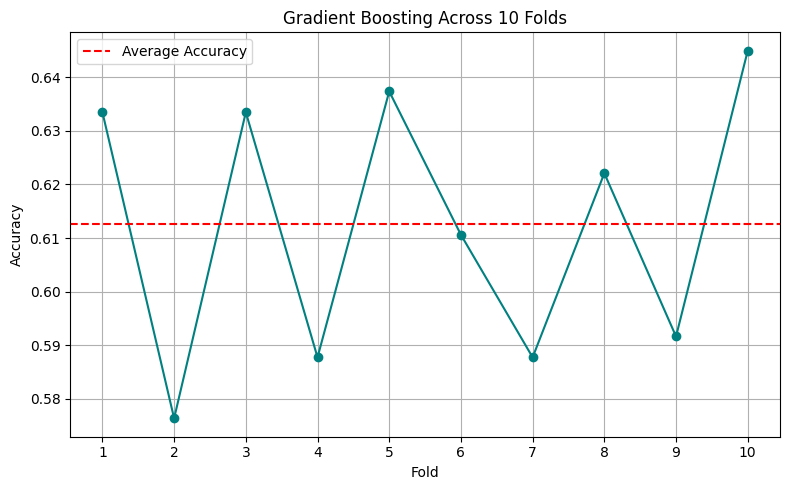

In [36]:
accuracies = [0.6335, 0.5763, 0.6335, 0.5877, 0.6374, 0.6106, 0.5877, 0.6221, 0.5916, 0.6450]

plt.figure(figsize=(8,5))
plt.plot(range(1,11), accuracies, marker='o', linestyle='-', color='teal')
plt.axhline(y=sum(accuracies)/len(accuracies), color='red', linestyle='--', label='Average Accuracy')
plt.title('Gradient Boosting Across 10 Folds')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.xticks(range(1,11))
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('accuracy_per_fold.png')
plt.show()
plt.show()

In [35]:
# FINAL MODEL EVALUATION SET

gb_pipeline.fit(trainX_full, trainY_full)
y_test_predict = gb_pipeline.predict(testX)

# classification report
class_report = classification_report(testY, y_test_predict)

# accuracy score
ac = accuracy_score(testY, y_test_predict)

# confusion matrix
cm = confusion_matrix(testY, y_test_predict)

if cm.shape == (2,2):
    tp, fn, fp, tn = cm.ravel()
else:
    tp = fn = fp = tn = 0

# metrics
precision = tp / (tp + fp) if (tp + fp) != 0 else 0
recall = tp / (tp + fn) if (tp + fn) != 0 else 0
specificity = tn / (fp + tn) if (fp + tn) != 0 else 0
f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

# append this for visualization
accuracy_summary.append({
    "Model": "Gradient Boosting",
    "Test Accuracy": ac
})

precision_summary.append({
    "Model": "Gradient Boosting",
    "Precision": precision
})

recall_summary.append({
    "Model":"Gradient Boosting",
    "Recall": recall
})

specificity_summary.append({
    "Model":"Gradient Boosting",
    "Specificity": specificity
})

f1_summary.append({
    "Model":"Gradient Boosting",
    "F1 Score": f1
})

print('\nFinal Evaluation on Test Set using Gradient Boosting:')
print('Confusion Matrix:\n', cm)
print('Classification Report:\n', class_report)
print("Test Accuracy:", ac)


Final Evaluation on Test Set using Gradient Boosting:
Confusion Matrix:
 [[275 137]
 [120 124]]
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.67      0.68       412
           1       0.48      0.51      0.49       244

    accuracy                           0.61       656
   macro avg       0.59      0.59      0.59       656
weighted avg       0.61      0.61      0.61       656

Test Accuracy: 0.6082317073170732


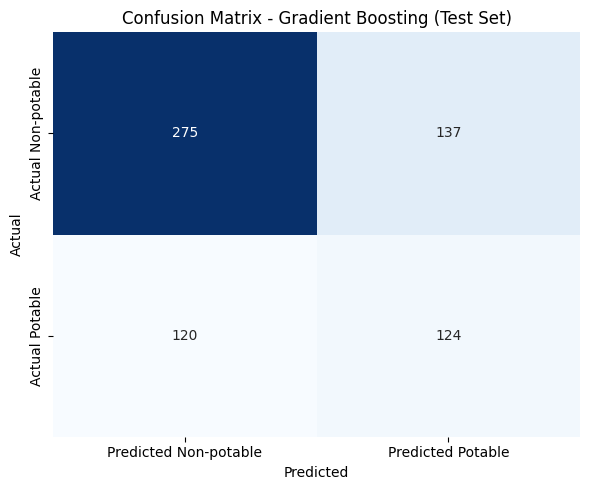

In [35]:
cm = [[275, 137],
      [120, 124]]

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Non-potable', 'Predicted Potable'],
            yticklabels=['Actual Non-potable', 'Actual Potable'])
plt.title('Confusion Matrix - Gradient Boosting (Test Set)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.savefig('confusion_matrix_testset.png')

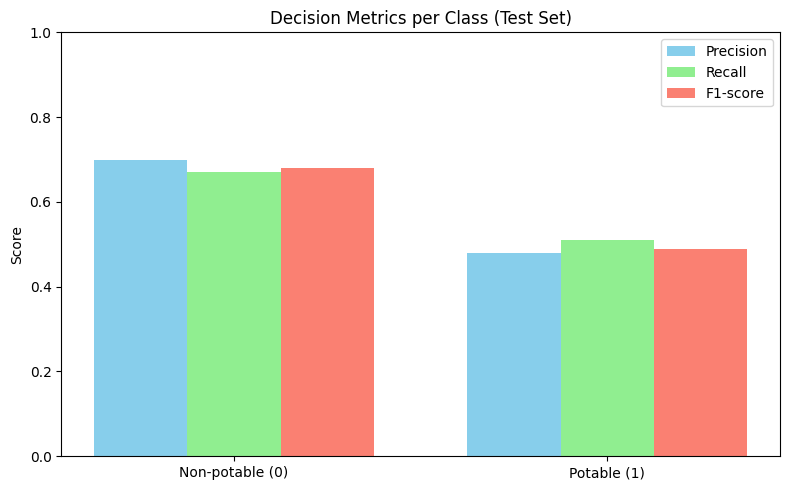

In [37]:
labels = ['Non-potable (0)', 'Potable (1)']
precision = [0.70, 0.48]
recall = [0.67, 0.51]
f1_score = [0.68, 0.49]

x = np.arange(len(labels))  # label locations
width = 0.25  # width of bars

plt.figure(figsize=(8,5))
plt.bar(x - width, precision, width, label='Precision', color='skyblue')
plt.bar(x, recall, width, label='Recall', color='lightgreen')
plt.bar(x + width, f1_score, width, label='F1-score', color='salmon')

plt.ylabel('Score')
plt.title('Decision Metrics per Class (Test Set)')
plt.xticks(x, labels)
plt.ylim(0, 1)
plt.legend()
plt.tight_layout()
plt.savefig('metrics_per_class_testset.png')
plt.show()

### Visualizing Summary of Metrics

In [36]:
# COLOR PALETTES
colors = ['#4E79A7', '#F28E2B', '#E15759', '#76B7B2', '#59A14F', '#EDC948', '#B07AA1']

In [37]:
accuracy_df = pd.DataFrame(accuracy_summary)
accuracy_df

,Model,Test Accuracy
0,Random Forest Classifier,0.641768
1,Decision Tree Classifier,0.583841
2,KNN,0.638720
3,Logistic Regression,0.496951
4,SVM,0.513720
5,Naive Bayes,0.586890
6,Gradient Boosting,0.608232


In [38]:
precision_df = pd.DataFrame(precision_summary)
precision_df

,Model,Precision
0,Random Forest Classifier,0.706294
1,Decision Tree Classifier,0.686327
2,KNN,0.676056
3,Logistic Regression,0.620588
4,SVM,0.627397
5,Naive Bayes,0.673219
6,Gradient Boosting,0.696203


In [39]:
recall_df = pd.DataFrame(recall_summary)
recall_df

,Model,Recall
0,Random Forest Classifier,0.735437
1,Decision Tree Classifier,0.621359
2,KNN,0.815534
3,Logistic Regression,0.512136
4,SVM,0.555825
5,Naive Bayes,0.665049
6,Gradient Boosting,0.667476


In [40]:
f1_df = pd.DataFrame(f1_summary)
f1_df

,Model,F1 Score
0,Random Forest Classifier,0.720571
1,Decision Tree Classifier,0.652229
2,KNN,0.739274
3,Logistic Regression,0.561170
4,SVM,0.589447
5,Naive Bayes,0.669109
6,Gradient Boosting,0.681537


In [41]:
specificity_df = pd.DataFrame(specificity_summary)
specificity_df

,Model,Specificity
0,Random Forest Classifier,0.483607
1,Decision Tree Classifier,0.520492
2,KNN,0.340164
3,Logistic Regression,0.471311
4,SVM,0.442623
5,Naive Bayes,0.454918
6,Gradient Boosting,0.508197


In [42]:
# GET Y VALUES FROM DATAFRAMES
accuracies = accuracy_df.set_index('Model').reindex([
    'Random Forest Classifier', 'Decision Tree Classifier', 'KNN',
    'Logistic Regression', 'SVM', 'Naive Bayes', 'Gradient Boosting'
])['Test Accuracy'].values

precisions = precision_df.set_index('Model').reindex([
    'Random Forest Classifier', 'Decision Tree Classifier', 'KNN',
    'Logistic Regression', 'SVM', 'Naive Bayes', 'Gradient Boosting'
])['Precision'].values

recalls = recall_df.set_index('Model').reindex([
    'Random Forest Classifier', 'Decision Tree Classifier', 'KNN',
    'Logistic Regression', 'SVM', 'Naive Bayes', 'Gradient Boosting'
])['Recall'].values

f1_scores = f1_df.set_index('Model').reindex([
    'Random Forest Classifier', 'Decision Tree Classifier', 'KNN',
    'Logistic Regression', 'SVM', 'Naive Bayes', 'Gradient Boosting'
])['F1 Score'].values

specificities = specificity_df.set_index('Model').reindex([
    'Random Forest Classifier', 'Decision Tree Classifier', 'KNN',
    'Logistic Regression', 'SVM', 'Naive Bayes', 'Gradient Boosting'
])['Specificity'].values


In [43]:
# CONSOLIDATE METRICS INTO ONE TABLE
data = {
    'Model': [
        'Random Forest Classifier', 'Decision Tree Classifier', 'KNN',
        'Logistic Regression', 'SVM', 'Naive Bayes', 'Gradient Boosting'
    ],
    'Accuracy': accuracies,
    'Precision': precisions,
    'Recall': recalls,
    'F1 Score': f1_scores,
    'Specificity': specificities
}

consolidated_df = pd.DataFrame(data)

consolidated_df


,Model,Accuracy,Precision,Recall,F1 Score,Specificity
0,Random Forest Classifier,0.641768,0.706294,0.735437,0.720571,0.483607
1,Decision Tree Classifier,0.583841,0.686327,0.621359,0.652229,0.520492
2,KNN,0.638720,0.676056,0.815534,0.739274,0.340164
3,Logistic Regression,0.496951,0.620588,0.512136,0.561170,0.471311
4,SVM,0.513720,0.627397,0.555825,0.589447,0.442623
5,Naive Bayes,0.586890,0.673219,0.665049,0.669109,0.454918
6,Gradient Boosting,0.608232,0.696203,0.667476,0.681537,0.508197


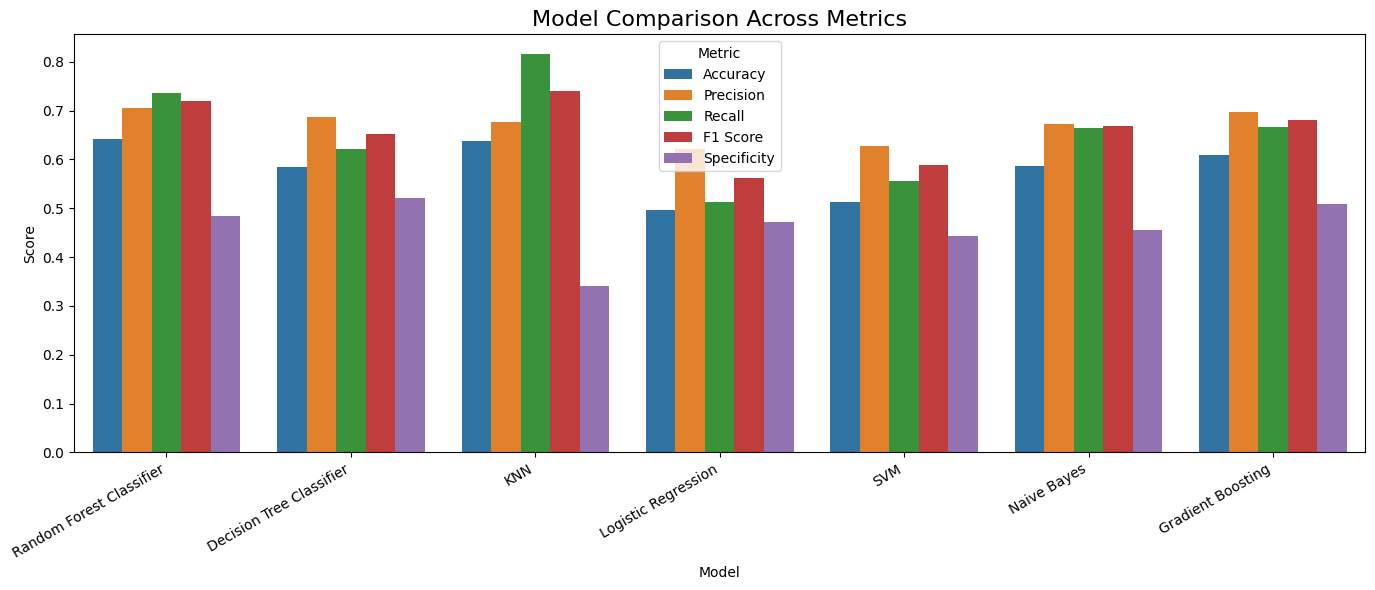

In [44]:
# VISUALIZE CONSOLIDATED DATA

consolidated_df_melted = consolidated_df.melt(id_vars="Model", var_name="Metric", value_name="Score")

plt.figure(figsize=(14,6))
sns.barplot(x="Model", y="Score", hue="Metric", data=consolidated_df_melted)

plt.title('Model Comparison Across Metrics', fontsize=16)
plt.ylabel('Score')
plt.xticks(rotation=30, ha='right')
plt.legend(title='Metric')
plt.tight_layout()
plt.show()

# Observations and Insights

- **Best Recall:** KNN is the best at identifying positive class *(Recall = 0.816)* and has the highest *F1 Score at 0.739*
- **Best Precision:** Random Forest leads with *0.706*, followed closely by Gradient Boosting at 0.696.
- **Best Specificity:** Gradient Boosting *(0.508)* slightly outperforms others.
- **Best Overall Balanced Performance:**  Random Forest and Gradient Boosting show strong, balanced performance across precision, recall, and F1.